José Manuel Ramírez Araiza


# Repaso - Módulo 2
---

## Cifrado

Se recibió un mensaje cifrado con un método congruencial simple: $ x_n = (ax_{n-1}+b)\mod m $.

El cifrado que se usó es el siguiente:
- 0 corresponde a 'A'
- 1 corresponde a 'B'
- 2 corresponde a 'C'
- ...
- 25 corresponde a 'Z' (no hay 'Ñ')
- Se toma la letra y se le suma un número aleatorio desconocido.
- Se generan 3 números antes de empezar el cifrado; esto quiere decir que la primera letra es "Letra + $x_4$"
- El mensaje que llegó fue: "12, 18, 9, 25"

Sabiendo de antemano que los parámetros de este generador son $m=16$, $a=5$, $b=3$ y que la semilla fue $7$; ¿cuál es el mensaje decodificado?

In [3]:
m = 16
a = 5
b = 3
x0 = 7
x1 = (a*x0 + b) % m
x2 = (a*x1 + b) % m
x3 = (a*x2 + b) % m
x4 = (a*x3 + b) % m
x5 = (a*x4 + b) % m
x6 = (a*x5 + b) % m
x7 = (a*x6 + b) % m
x8 = (a*x7 + b) % m
x9 = (a*x8 + b) % m
x10 = (a*x9 + b) % m
x11 = (a*x10 + b) % m


x1,x2,x3, x4, x5, x6, x7, x8, x9, x10, x11

(6, 1, 8, 11, 10, 5, 12, 15, 14, 9, 0)

In [9]:
12-11

1

In [10]:
18-10

8

In [11]:
9-5

4

In [12]:
25-12

13

In [ ]:
#MENSAJE
A=0
B=1
C=2
D=3
E=4
F=5
G=6
H=7
I=8
J=9
K=10
L=11
M=12
N=13
#BIEN


## Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [68]:
import numpy as np

def montecarlo_tipo1(f, a, b, num_muestras=10000):
    x = np.random.uniform(a, b, num_muestras)
    fx = f(x)
    integral = np.mean(fx)
    integral *= (b - a)
    return integral

In [69]:
def f(x):
    return x**2

resultado = montecarlo_tipo1(f, 0, 1)


print(resultado)

0.3318487253437654


Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [4]:
import numpy as np
import pandas as pd
def f1(x):
    return np.sqrt(1+x**4)
def f2(x):
    return np.log(np.log(x))
def f3(x):
    return (1/np.log(x))
def f4(x):
    return np.e**(-x**2)/2
N = np.logspace(1, 5, 5)
a = 4
b = 7

tabla = pd.DataFrame(columns = ["Aproximación1", "Error1", "Aproximación2", "Error2","Aproximación3", "Error3", "Aproximación4", "Error4"], index = N )

def montecarlo(f, N, a , b) :
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)


for i in N :
    aproximacion = montecarlo(f1, int(i), a, b)
    tabla.loc[i, "Aproximacion1"] = aproximacion
    tabla.loc[i, "Error1"] = abs(20.3583 - aproximacion) #El 20.3583 es el resultado de la integral definida, primero resolver la integral

for i in N :
    aproximacion = montecarlo(f2, int(i), a, b)
    tabla.loc[i, "Aproximacion2"] = aproximacion
    tabla.loc[i, "Error2"] = abs(0.405885 - aproximacion)

for i in N :
    aproximacion = montecarlo(f3, int(i), a, b)
    tabla.loc[i, "Aproximacion3"] = aproximacion
    tabla.loc[i, "Error3"] = abs(0.667003 - aproximacion)
    
for i in N :
    aproximacion = montecarlo(f4, int(i), a, b)
    tabla.loc[i, "Aproximacion4"] = aproximacion
    tabla.loc[i, "Error4"] = abs(0.0000786695 - aproximacion)
    
tabla

,Aproximación1,Error1,Aproximación2,Error2,Aproximación3,Error3,Aproximación4,Error4,Aproximacion1,Aproximacion2,Aproximacion3,Aproximacion4
10.0,NaN,84.817969,NaN,1.133085,NaN,1.161939,NaN,0.000079,105.176269,1.538970,1.828942,2.362812e-09
100.0,NaN,70.935581,NaN,1.149526,NaN,1.114048,NaN,0.000079,91.293881,1.555411,1.781051,1.101784e-08
1000.0,NaN,74.421017,NaN,1.145165,NaN,1.132145,NaN,0.000079,94.779317,1.551050,1.799148,7.060265e-09
10000.0,NaN,72.567669,NaN,1.155426,NaN,1.121411,NaN,0.000079,92.925969,1.561311,1.788414,6.449362e-09
100000.0,NaN,72.804585,NaN,1.157766,NaN,1.122066,NaN,0.000079,93.162885,1.563651,1.789069,6.818895e-09


## Montecarlo Tipo 2
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

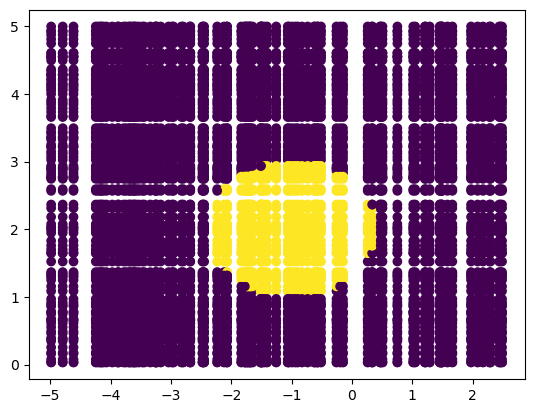

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x,y) :
    return x**2+2*y**2<=-2*x+8*y-7

def montecarlo2 (region, xa, xb, ya, yb, N) :
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x, y)
    AR = (xb - xa)*(yb - ya)
    
    return np.mean(B)*AR

x = np.random.uniform(-5, 2.5, 100)
y = np.random.uniform(0, 5, 100)

X, Y = np.meshgrid(x, y)

plt.figure()
plt.scatter(X, Y, c=f(X, Y))

In [11]:
montecarlo2(f,-5,2,0,5,10)

3.5

In [9]:
N = np.logspace(1,6,6)
N

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [13]:
tabla = pd.DataFrame(columns = ["Aproximacion"], index = N)

for i in N :
    aproximacion = montecarlo2(f, -5, 2, 0, 5, int(i))
    tabla.loc[i, "Aproximacion"] = aproximacion   
    
tabla

,Aproximacion
10.0,7.0
100.0,3.15
1000.0,4.795
10000.0,4.3995
100000.0,4.4093
1000000.0,4.444195


---
## Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [1]:
import pandas as pd
import numpy as np

In [15]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [20]:
df["$a_i$"][2]

0.5

In [25]:
import random
x = [0]
y = [0]
for k in range(10000):
    i = random.choices([0,1,2,3], weights=df["$p_i$"])
    
    a = float(df["$a_i$"][i])
    b = float(df["$b_i$"][i])
    c = float(df["$c_i$"][i])
    d = float(df["$d_i$"][i])
    e = float(df["$e_i$"][i])
    f = float(df["$f_i$"][i])
    g = float(df["$p_i$"][i])
    
    xkm1=a*x[-1]+b*y[-1]+e
    ykm1=c*x[-1]+d*y[-1]+f
    
    x.append(xkm1)
    y.append(ykm1)

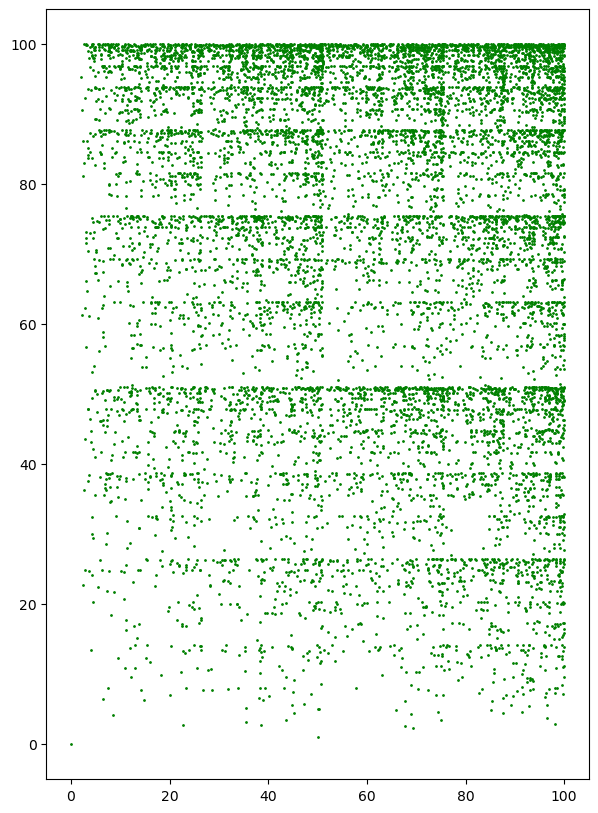

In [26]:
plt.figure(figsize=(7,10))
plt.scatter(x,y, s=1, c="g")

---
## Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [33]:
import yfinance as yf

In [53]:
data = yf.download(["MSFT", "AAPL"], "2015-01-01", "2019-12-31")
data

[*********************100%%**********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 AAPL        MSFT       AAPL        MSFT       AAPL   
Date                                                                  
2015-01-02  24.498678   40.534847  27.332500   46.759998  27.860001   
2015-01-05  23.808519   40.162090  26.562500   46.330002  27.162500   
2015-01-06  23.810759   39.572620  26.565001   45.650002  26.857500   
2015-01-07  24.144632   40.075397  26.937500   46.230000  27.049999   
2015-01-08  25.072323   41.254337  27.972500   47.590000  28.037500   
...               ...         ...        ...         ...        ...   
2019-12-23  69.261604  151.994110  71.000000  157.410004  71.062500   
2019-12-24  69.327454  151.965149  71.067497  157.380005  71.222504   
2019-12-26  70.702927  153.210770  72.477501  158.669998  72.495003   
2019-12-27  70.676086  153.490799  72.449997  158.960007  73.492500   
2019-12-30  71.095581  152.167938  72.879997  157.589996  73.172501   

                              Low                   Open              \
                  MSFT       AAPL        MSFT       AAPL        MSFT   
Date                                                                   
2015-01-02   47.419998  26.837500   46.540001  27.847500   46.660000   
2015-01-05   46.730000  26.352501   46.250000  27.072500   46.369999   
2015-01-06   46.750000  26.157499   45.540001  26.635000   46.380001   
2015-01-07   46.459999  26.674999   45.490002  26.799999   45.980000   
2015-01-08   47.750000  27.174999   46.720001  27.307501   46.750000   
...                ...        ...         ...        ...         ...   
2019-12-23  158.119995  70.092499  157.270004  70.132500  158.119995   
2019-12-24  157.710007  70.730003  157.119995  71.172501  157.479996   
2019-12-26  158.729996  71.175003  157.399994  71.205002  157.559998   
2019-12-27  159.550003  72.029999  158.220001  72.779999  159.449997   
2019-12-30  159.020004  71.305000  156.729996  72.364998  158.990005   

               Volume            
                 AAPL      MSFT  
Date                             
2015-01-02  212818400  27913900  
2015-01-05  257142000  39673900  
2015-01-06  263188400  36447900  
2015-01-07  160423600  29114100  
2015-01-08  237458000  29645200  
...               ...       ...  
2019-12-23   98572000  17718200  
2019-12-24   48478800   8989200  
2019-12-26   93121200  14520600  
2019-12-27  146266000  18412800  
2019-12-30  144114400  16348400  

[1257 rows x 12 columns]

In [54]:
data["High"] #Máximos

,AAPL,MSFT
Date,,
2015-01-02,27.860001,47.419998
2015-01-05,27.162500,46.730000
2015-01-06,26.857500,46.750000
2015-01-07,27.049999,46.459999
2015-01-08,28.037500,47.750000
...,...,...
2019-12-23,71.062500,158.119995
2019-12-24,71.222504,157.710007
2019-12-26,72.495003,158.729996


In [55]:
data["Low"] #Mínimos

,AAPL,MSFT
Date,,
2015-01-02,26.837500,46.540001
2015-01-05,26.352501,46.250000
2015-01-06,26.157499,45.540001
2015-01-07,26.674999,45.490002
2015-01-08,27.174999,46.720001
...,...,...
2019-12-23,70.092499,157.270004
2019-12-24,70.730003,157.119995
2019-12-26,71.175003,157.399994


Calcule los rendimientos diarios junto con sus características estadísticas

In [35]:
data = yf.download(["MSFT", "AAPL"], "2015-01-01", "2019-12-31")

[*********************100%%**********************]  2 of 2 completed


In [36]:
data = data["Adj Close"]

In [41]:
R = (data-data.shift())/data.shift()

In [57]:
R.mean() #Media

AAPL    0.000971
MSFT    0.001161
dtype: float64

In [58]:
R.std() #Desviación estándar

AAPL    0.015651
MSFT    0.014692
dtype: float64

In [59]:
R.describe()

,AAPL,MSFT
count,1256.000000,1256.000000
mean,0.000971,0.001161
std,0.015651,0.014692
min,-0.099608,-0.092533
25%,-0.005857,-0.005404
50%,0.000892,0.000890
75%,0.008924,0.008059
max,0.070421,0.104523


<Axes: ylabel='Frequency'>

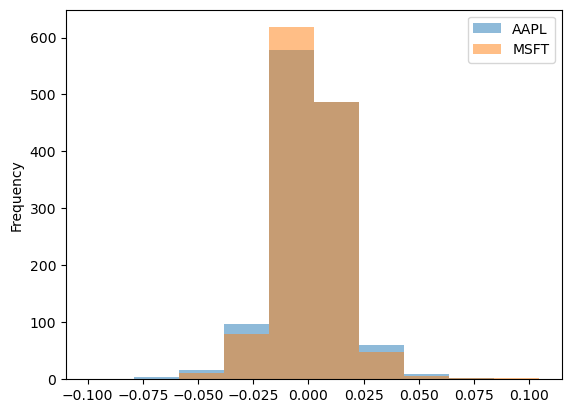

In [43]:
R.plot.hist(alpha=0.5)

Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

In [75]:
R.std()

AAPL    0.015651
MSFT    0.014692
dtype: float64

In [74]:
#AAPL
def sim_R(media,std,fecha_inicio,dias,N):
    R_sim =  np.random.normal(media,std,size=(dias,N))
    fechas=pd.date_range(start=fecha_inicio,periods=dias)
    return pd.DataFrame(index=fechas,data=R_sim)
sim_R(0.000971,0.015651,"2020-10-10",50,1000)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-10-10,-0.008607,0.003457,-0.002219,-0.001561,-0.013945,0.003594,-8.259117e-03,0.030502,-0.032720,0.025069,...,0.007438,-0.025239,-0.003677,0.022256,-0.015807,-0.023780,0.001802,-0.010458,-0.003272,0.010521
2020-10-11,-0.008325,-0.005065,-0.003985,0.003172,-0.013840,0.015714,5.277209e-04,-0.003802,-0.006155,0.026621,...,0.017859,0.007464,0.022143,0.038829,-0.025664,0.026914,0.006985,-0.011219,0.030735,0.005293
2020-10-12,-0.018547,0.009484,-0.012262,-0.001994,-0.009880,0.000337,-1.451244e-02,0.006496,-0.018203,0.000600,...,-0.021529,-0.006612,-0.015694,0.000139,0.023963,-0.005742,0.004790,-0.036894,0.010948,0.023257
2020-10-13,0.007630,-0.006272,-0.006736,0.028156,-0.014309,0.011293,1.784773e-02,-0.003861,-0.005359,-0.038066,...,0.016750,0.016095,-0.002504,0.010014,0.012952,-0.006835,0.002469,-0.001601,0.004950,-0.016880
2020-10-14,0.026556,0.026649,-0.018745,-0.014472,-0.010952,-0.000677,-2.716488e-02,-0.003673,0.014900,0.008283,...,0.017724,0.003889,-0.030233,0.000074,0.018076,-0.017724,-0.034157,0.005219,0.007385,0.030998
2020-10-15,0.014653,0.006965,0.023465,-0.009585,0.014964,0.028170,5.984699e-03,0.009478,-0.013059,-0.001532,...,0.020548,-0.009527,-0.017988,-0.023627,0.030258,0.006362,0.026752,-0.009151,-0.017669,0.017372
2020-10-16,0.012202,0.005114,0.002635,-0.018748,0.009953,-0.018236,1.247725e-02,-0.015039,0.024929,-0.005531,...,-0.018853,-0.003657,0.007954,-0.005263,-0.006302,-0.008707,-0.005889,0.012513,0.006148,0.029840
2020-10-17,0.006648,-0.028379,0.015834,0.013011,0.029221,0.006732,5.422480e-07,-0.004850,0.028981,0.007148,...,0.008457,0.012427,-0.006504,0.005951,-0.024614,0.013138,0.023051,-0.014734,0.001426,0.011538
2020-10-18,-0.037382,-0.008950,-0.025402,-0.009148,-0.024221,0.010534,-1.010986e-02,0.014982,-0.001115,-0.021029,...,-0.001955,0.017455,0.013867,0.006521,-0.016831,0.001779,0.020400,-0.030071,0.004733,0.021514
2020-10-19,0.026343,0.002710,-0.006467,0.023459,-0.000034,0.009099,1.287716e-02,-0.008238,0.005580,-0.001334,...,0.008359,0.009728,-0.000736,0.002613,-0.005341,-0.001093,0.001207,0.026092,0.001532,0.025765


In [76]:
#MFST
def sim_R(media,std,fecha_inicio,dias,N):
    R_sim =  np.random.normal(media,std,size=(dias,N))
    fechas=pd.date_range(start=fecha_inicio,periods=dias)
    return pd.DataFrame(index=fechas,data=R_sim)
sim_R(0.001161,0.014692,"2020-10-10",50,1000)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-10-10,0.003105,0.011569,0.011368,0.018103,-0.000913,0.011599,-0.021070,0.004363,0.004000,-0.016209,...,0.021891,0.007826,-0.016380,-0.004981,0.001194,-0.018583,-0.024937,0.021296,0.019320,0.011029
2020-10-11,0.017830,0.013963,0.014802,0.008958,-0.020942,-0.009399,-0.002974,0.024253,0.016558,0.025823,...,-0.025804,0.039072,-0.005473,0.003007,0.010330,0.019581,-0.027000,0.023091,-0.006405,-0.020025
2020-10-12,-0.001583,-0.011323,-0.000693,-0.013883,-0.006356,0.010016,-0.003877,0.014885,0.002642,0.005144,...,-0.005344,-0.019985,-0.009918,-0.005839,-0.007048,-0.002630,0.005511,-0.024156,0.003925,0.009371
2020-10-13,-0.005363,0.008956,-0.008280,-0.002457,-0.020012,0.017607,-0.000073,0.017945,0.014043,0.005762,...,0.005293,-0.004252,0.012277,0.009681,-0.007402,0.012373,-0.016748,-0.009148,-0.000393,-0.009951
2020-10-14,-0.003999,-0.014636,-0.004986,-0.029397,-0.005010,-0.007022,0.002611,0.019826,0.002849,0.001941,...,0.026795,0.013751,0.014115,-0.003271,-0.019182,-0.005999,-0.021710,-0.007434,0.015974,-0.004456
2020-10-15,0.006636,-0.003597,0.036698,0.018872,-0.014788,0.008542,-0.033020,0.017182,-0.002213,-0.005178,...,0.011946,-0.009961,0.009412,-0.000351,0.018937,-0.024308,0.000043,-0.013665,-0.029978,-0.017499
2020-10-16,-0.007055,-0.015028,0.000504,-0.001715,-0.009712,-0.008739,0.005096,-0.004781,-0.010236,-0.008254,...,-0.006363,-0.035341,0.013760,0.013408,0.005022,-0.004938,0.017062,-0.012343,-0.012429,0.026247
2020-10-17,0.022215,-0.007579,0.002016,0.018222,0.011260,0.008783,0.006974,-0.002288,-0.001450,0.009152,...,-0.006179,0.013600,0.003638,-0.013788,-0.000900,0.006555,-0.037398,-0.020217,0.008248,-0.011038
2020-10-18,-0.020947,0.001896,0.013163,0.019887,0.020719,0.011691,0.016839,-0.020339,0.010513,0.005430,...,-0.002793,-0.017059,-0.000151,0.003676,-0.002303,0.006488,0.001682,0.009637,-0.013969,-0.007605
2020-10-19,-0.006174,0.021934,-0.005976,0.020669,-0.013298,-0.010436,0.007510,-0.010214,0.010792,-0.000107,...,0.016082,-0.008209,0.009449,0.001845,-0.014229,-0.004652,-0.012790,0.012186,0.018668,-0.003956


Calcule los precios con base en los rendimientos simulados

In [ ]:
valor_deseado=data[-1]*1.03
data[-1],valor_deseado

In [ ]:
sobrepasa=valor_deseado<= precios_simulado
sobrepasa

In [ ]:
probabilidad=sobrepasa.mean(axis=1)
probabilidad.plot(grid=True)

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [ ]:
sim_aapl = sim_R(R["AAPL"].mean(), R["AAPL"].std(),"2023-10-16", 100, 10000) 
sim_msft = sim_R(R["MSFT"].mean(), R["MSFT"].std(),"2023-10-16", 100, 10000)

In [ ]:
sim_precios_aapl = data["AAPL"][-1] * (1 + sim_aapl).cumprod()
sim_precios_msft = data["MSFT"][-1] * (1 + sim_msft).cumprod()

In [ ]:
porcentaje = 1.20
valor_deseado_aapl = data["AAPL"][-1] * porcentaje
valor_deseado_msft = data["MSFT"][-1] * porcentaje

In [ ]:
sobrepasa_aapl = valor_deseado_aapl <= sim_precios_aapl
sobrepasa_msft = valor_deseado_msft <= sim_precios_msft

In [ ]:
probabilidad_aapl =  sobrepasa_aapl.mean(axis=1)
probabilidad_msft =  sobrepasa_msft.mean(axis=1)

In [ ]:
tabla = pd.DataFrame(index=probabilidad_aapl.index)
tabla["Apple"] = probabilidad_aapl
tabla["Microsoft"] = probabilidad_msft
tabla.plot(grid=True)

In [ ]:
data.plot()

Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

In [ ]:
data = yf.download(["MSFT", "AAPL"], "2015-01-01", "2020-12-31")
R = (data - data.shift())/data.shift()
R.plot.hist()

## Probabilidad

Imagina que en un país la estatura promedio es 164 centímetros, con una desviación estándar de 4 centímetros. ¿Cuál es la probabilidad de que si sumamos la estatura de 20 personas se obtenga un valor mayor a 30 metros?

In [60]:
import math
from scipy.stats import norm

media_individual = 164  # en cm
desviacion_estandar_individual = 4  # en cm
n_personas = 20
altura_total = 30 * 100  # convertir a cm


media_suma = n_personas * media_individual
desviacion_estandar_suma = math.sqrt(n_personas) * desviacion_estandar_individual


z_score = (altura_total - media_suma) / desviacion_estandar_suma


probabilidad = 1 - norm.cdf(z_score)


In [61]:
probabilidad

1.0